In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/barcode-image/BAR_ALL/imagejpg_9.txt
/kaggle/input/barcode-image/BAR_ALL/image_17.txt
/kaggle/input/barcode-image/BAR_ALL/image_4.jpg
/kaggle/input/barcode-image/BAR_ALL/image_12.jpg
/kaggle/input/barcode-image/BAR_ALL/image_16.jpg
/kaggle/input/barcode-image/BAR_ALL/image_2.jpg
/kaggle/input/barcode-image/BAR_ALL/imagejpg_7.jpg
/kaggle/input/barcode-image/BAR_ALL/imagejpg_9.jpg
/kaggle/input/barcode-image/BAR_ALL/image_7.jpg
/kaggle/input/barcode-image/BAR_ALL/imagejpg_4.jpg
/kaggle/input/barcode-image/BAR_ALL/imagejpg_7.txt
/kaggle/input/barcode-image/BAR_ALL/image_24.txt
/kaggle/input/barcode-image/BAR_ALL/image_19.jpg
/kaggle/input/barcode-image/BAR_ALL/image_11.jpg
/kaggle/input/barcode-image/BAR_ALL/image_20.txt
/kaggle/input/barcode-image/BAR_ALL/image_10.jpg
/kaggle/input/barcode-image/BAR_ALL/imagejpg_24.jpg
/kaggle/input/barcode-image/BAR_ALL/image_23.jpg
/kaggle/input/barcode-image/BAR_ALL/image_21.txt
/kaggle/input/barcode-image/BAR_ALL/image_0.txt
/kaggle/inp

In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.5/513.5 kB 7.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 14.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
Note: you may need to restart the kernel to use updated packages.



0: 736x1280 17 barcodes, 919.3ms
Speed: 3.7ms preprocess, 919.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


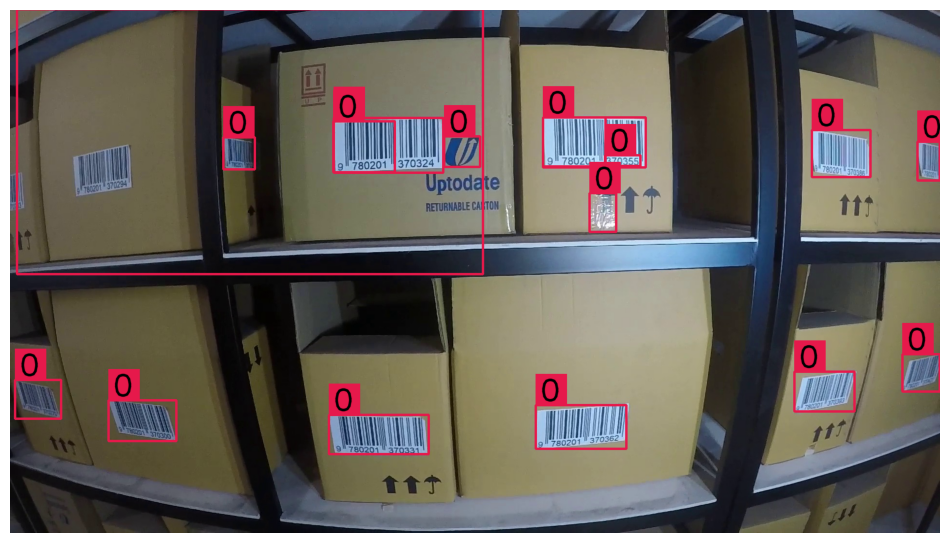

In [17]:
import supervision as sv

# extract video frame
# generator = sv.get_video_frames_generator('/kaggle/input/cxcxxcxc/pexels-kampus-production-7835166.mp4')
generator = sv.get_video_frames_generator('/kaggle/input/barcode-image/BAR_ALL/imagejpg_9.jpg')
# generator = sv.get_video_frames_generator('/kaggle/input/barcode-image/BAR_ALL/imagejpg_4.jpg')


iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
# sv.show_frame_in_notebook(frame, (16, 16))
sv.plot_image(frame)

In [3]:
pip install supervision

Note: you may need to restart the kernel to use updated packages.
